In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.tsa.arima.model as smt

Importing libraries


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AssignmentData.xlsx to AssignmentData.xlsx


In [ ]:


# Load the dataset (assuming it's an Excel file)
data = pd.read_excel('AssignmentData.xlsx')


In [ ]:
data.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [ ]:
print(data.isnull().sum())

Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64


In [ ]:
 data.dropna(inplace=True)
 data

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
...,...,...,...,...,...,...,...
1191,2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889


In [ ]:
data.isnull().sum()

Date                          0
Quarter                       0
Department                    0
Targeted Productivity         0
Overtime                      0
No. of Workers                0
Actual Productivity           0
Target Achieved               0
Department Quarterly Spend    0
Department Value              0
dtype: int64

In [ ]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 36


In [ ]:
data.drop_duplicates(inplace=True)

Creating a new column called Target Achieved (categorical as "Yes" if Actual Productivity is greater than Targeted Productivity, and "No" otherwise)

In [ ]:
data['Target Achieved'] = ['Yes' if actual > target else 'No' for actual, target in zip(data['Actual Productivity'], data['Targeted Productivity'])]

In [ ]:
data

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
6,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.755167,Yes
...,...,...,...,...,...,...,...,...
1191,2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596,Yes
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No


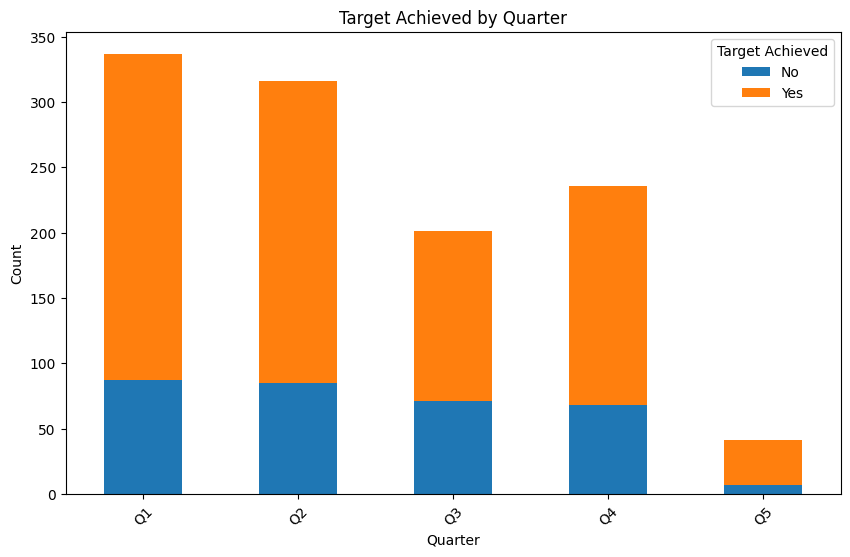

In [ ]:
# Grouping data by Quarter and Target Achieved
quarterly_target_achieved = data.groupby(['Quarter', 'Target Achieved']).size().unstack(fill_value=0)

# Plotting grouped bar graph
quarterly_target_achieved.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Target Achieved by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved')
plt.show()


In [ ]:
data.groupby(['Quarter','Department']).size()

Quarter  Department
Q1       Finishing     143
         Sewing        194
Q2       Finishing     141
         Sewing        175
Q3       Finishing      81
         Sewing        120
Q4       Finishing     105
         Sewing        131
Q5       Finishing      18
         Sewing         23
dtype: int64

In [ ]:


# Calculate Department Quarterly Spend (Rs. 4.2 lakh per quarter per department)
data['Department Quarterly Spend'] = 420000

data


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved,Department Quarterly Spend
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes,420000
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes,420000
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes,420000
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes,420000
6,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.755167,Yes,420000
...,...,...,...,...,...,...,...,...,...
1191,2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596,Yes,420000
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No,420000
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No,420000
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No,420000


In [ ]:
# Calculate Department Value
data['Department Value'] = data['Actual Productivity'] / data['Department Quarterly Spend']
data


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved,Department Quarterly Spend,Department Value
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes,420000,2.239822e-06
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes,420000,2.110714e-06
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes,420000,1.906120e-06
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes,420000,1.905060e-06
6,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.755167,Yes,420000,1.798016e-06
...,...,...,...,...,...,...,...,...,...,...
1191,2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596,Yes,420000,1.549039e-06
1192,2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No,420000,1.496032e-06
1194,2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No,420000,1.489583e-06
1195,2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No,420000,1.204497e-06


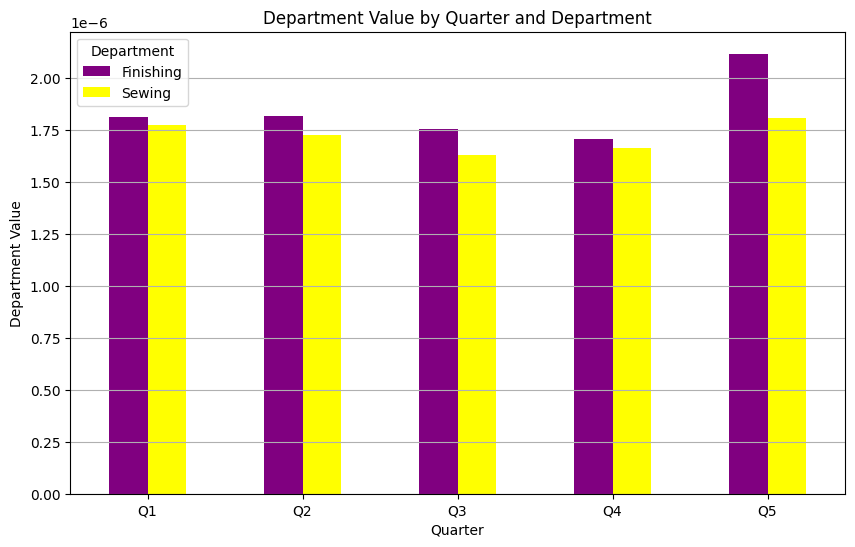

In [ ]:
# Pivot table to reshape data for visualization
pivot_table = data.pivot_table(index='Quarter', columns='Department', values='Department Value')

# Plotting the Department Value for each department over quarters
pivot_table.plot(kind='bar', figsize=(10, 6), color =['purple','yellow'])
plt.title('Department Value by Quarter and Department')
plt.xlabel('Quarter')
plt.ylabel('Department Value')
plt.xticks(rotation=0)
plt.legend(title='Department')
plt.grid(axis='y')
plt.show()

In [ ]:
# Split data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

# Extract the 'Actual Productivity' column
series = train_data['Actual Productivity']
series

0      0.940725
1      0.886500
2      0.800570
5      0.800125
6      0.755167
         ...   
895    0.700614
896    0.700362
897    0.601280
898    0.417917
899    0.371563
Name: Actual Productivity, Length: 848, dtype: float64

In [ ]:
# Fit an ARIMA model to the training data
model_arima = ARIMA(series, order=(5, 1, 0))
arima_fit = model_arima.fit()

# Forecast the next four quarters
arima_forecast = arima_fit.forecast(4)

# Print the forecasted values
print("ARIMA Forecast:")
for i, forecast in enumerate(arima_forecast):
    print(f"Quarter {i+1}: {forecast}")

In [ ]:
# Calculate rolling averages for different window sizes
rolling_averages = {}
for window in [3, 6, 9]:
    rolling_averages[f"Rolling Average ({window})"] = series.rolling(window=window).mean()




In [ ]:
# Forecast the next four quarters using the rolling averages
for window, average in rolling_averages.items():
    last_value = average[899]
    forecast = [last_value] * 4
    print(f"{window} Forecast:")
    for i, value in enumerate(forecast):
        print(f"Quarter {i+1}: {value}")

Rolling Average (3) Forecast:
Quarter 1: 0.46358638899999977
Quarter 2: 0.46358638899999977
Quarter 3: 0.46358638899999977
Quarter 4: 0.46358638899999977
Rolling Average (6) Forecast:
Quarter 1: 0.5820597118333334
Quarter 2: 0.5820597118333334
Quarter 3: 0.5820597118333334
Quarter 4: 0.5820597118333334
Rolling Average (9) Forecast:
Quarter 1: 0.6382303705555555
Quarter 2: 0.6382303705555555
Quarter 3: 0.6382303705555555
Quarter 4: 0.6382303705555555


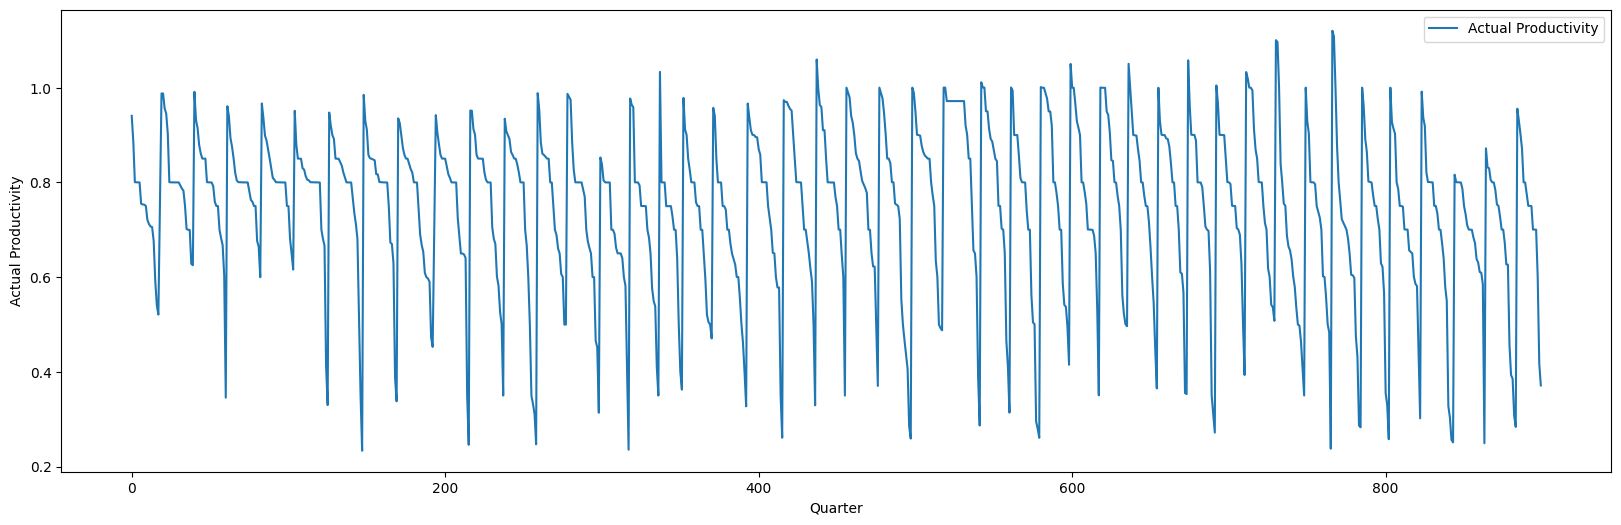

In [ ]:
# Plot the actual data and forecasts
plt.figure(figsize=(20, 6))
plt.plot(series, label='Actual Productivity')



plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

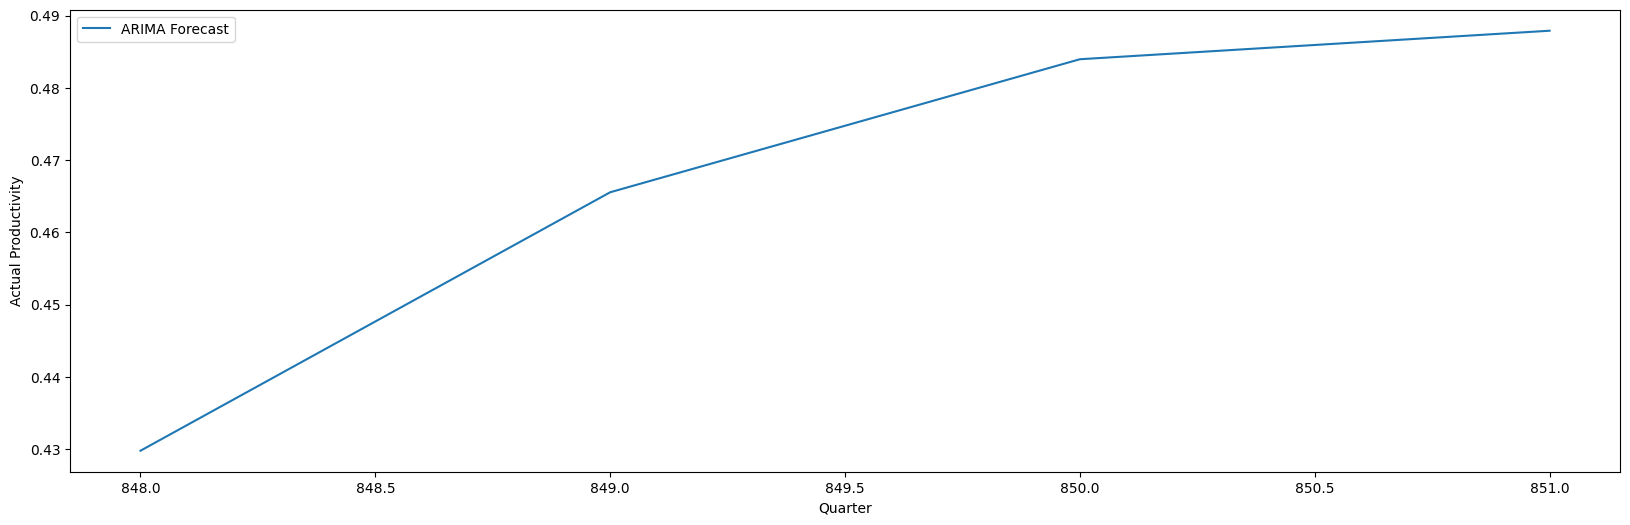

In [ ]:
# Plot the actual data and forecasts
plt.figure(figsize=(20, 6))
plt.plot(arima_forecast, label='ARIMA Forecast')

plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

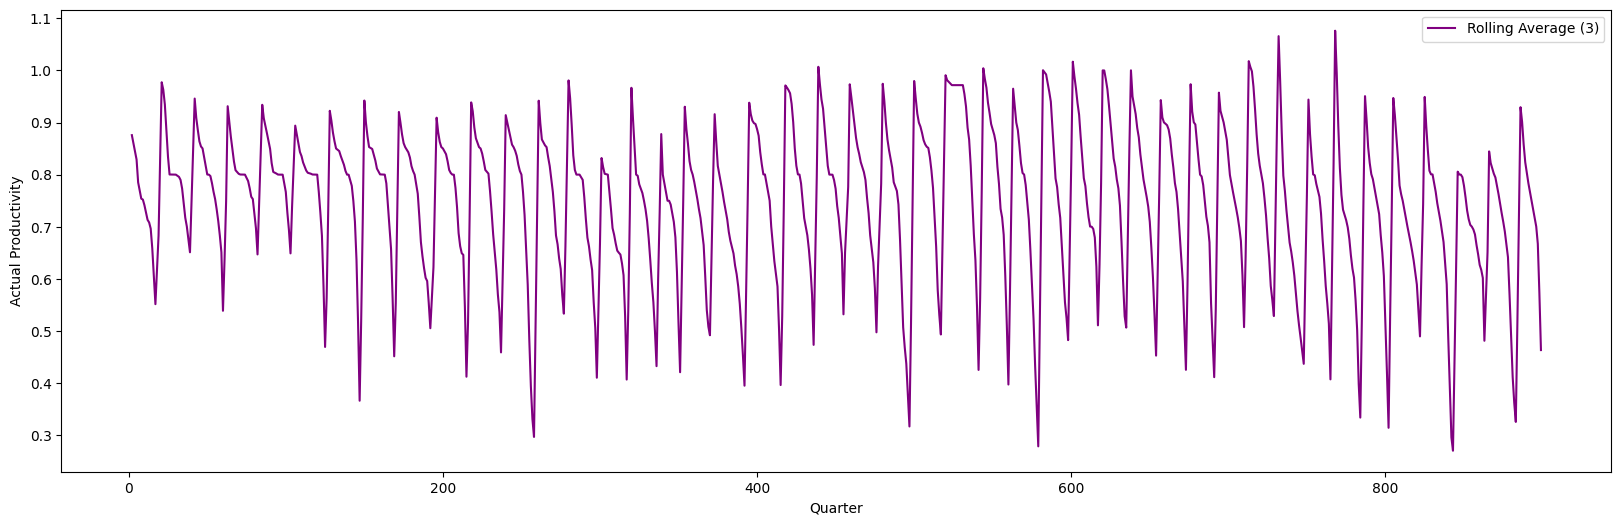

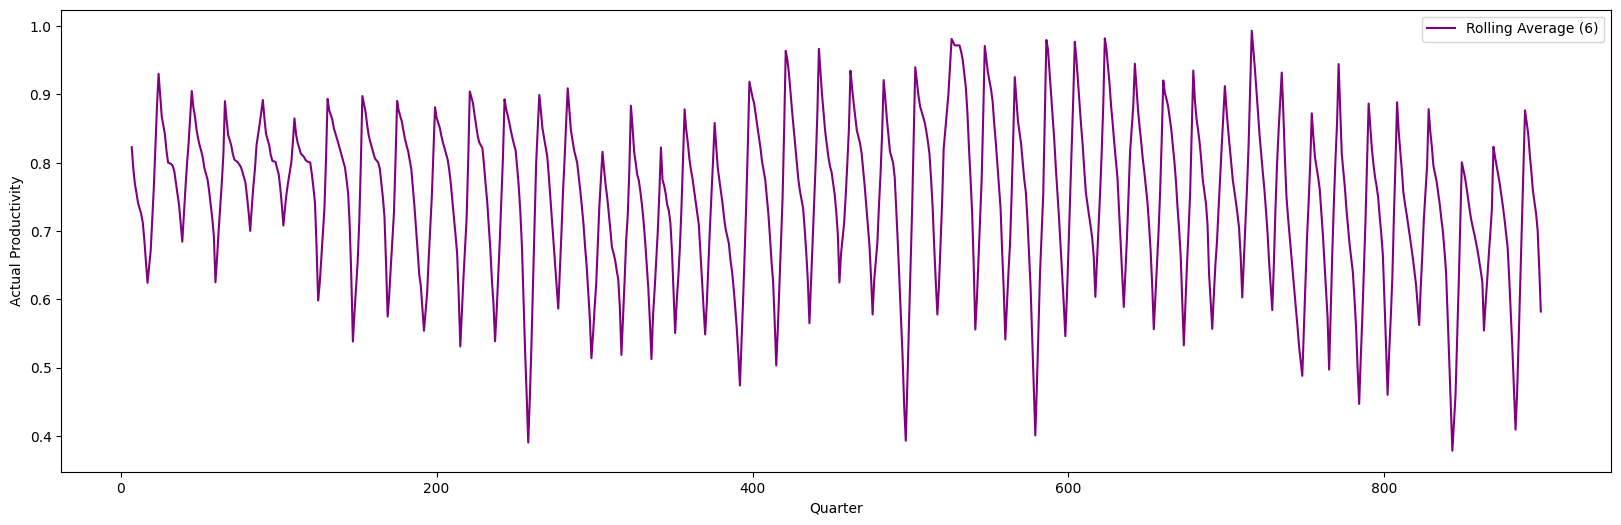

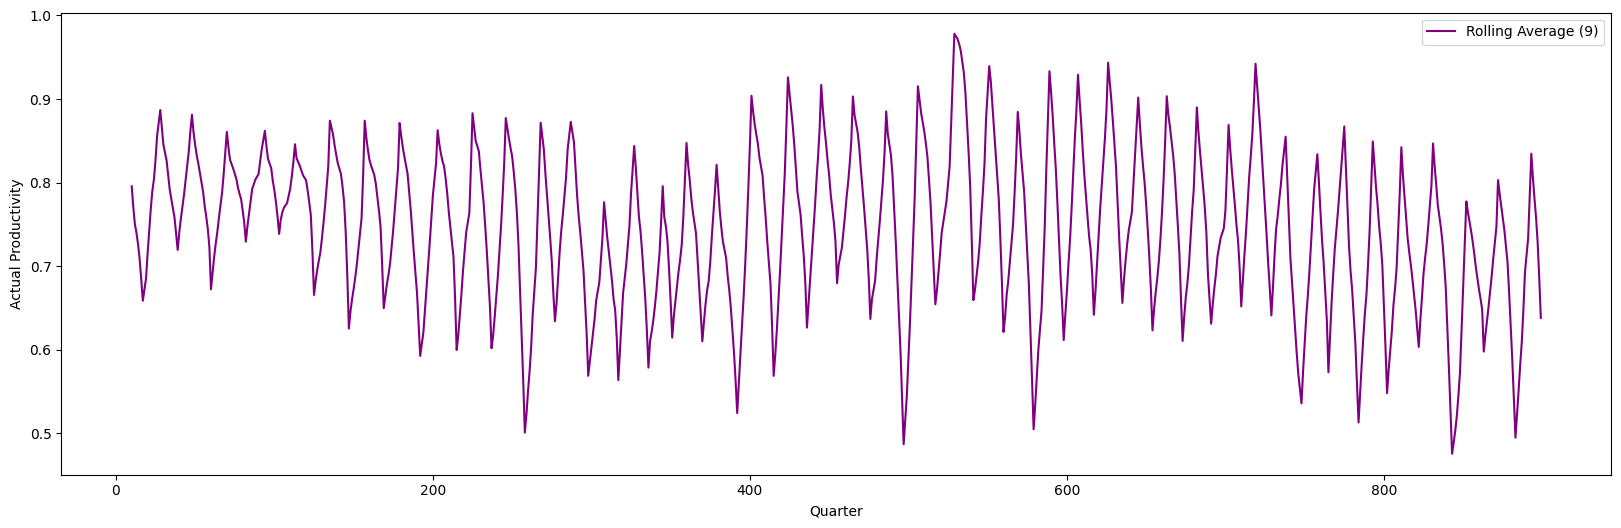

In [ ]:
# Plot the actual data and forecasts
for window, average in rolling_averages.items():
    plt.figure(figsize=(20, 6))
    plt.plot(average, label=window, c = 'purple')
    plt.xlabel('Quarter')
    plt.ylabel('Actual Productivity')
    plt.legend()
    plt.show()